## Experiments in the  fader-networks branch

* 'Home' notebook for running the experiments on the variants of the fader networks for gender
* This will be my main point for storing notes, keeping track of experiments etc. while I'm on holiday
* Follows on from fader_networks_recreate_baseline_20180718 notebook

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
# needs to run in the fader-networks branch
# (that's also where all the checkpoints are)
os.chdir('/home/ubuntu/msc-project-fader-networks/')
import training_monitor as tm


In [5]:
os.getcwd()

'/home/ubuntu/msc-project-fader-networks'

### 1) Training for concat with cross_entropy
* i.e. using the concat method to represent the gender variable (as a one-hot vector concatenated to the bottom of the speaker embedding, which is reduced to 254-dim to keep the overall speaker embedding space at 256-dim)
* training using the cross-entropy loss measure as per the FaderNetworks paper
* aim is to find a lambda schedule that trains sensibly, giving reconstruction losses that are comparable-ish to the baseline, and a sensible discriminator loss
* will then listen to samples to see if the gender flipping works; also play with the gender fading
* good test will then be whether we can discriminate gender using a much more complex network

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_concat_baseline163_20180720' --gender-method='concat' --lambda-discriminator-loss=0.1 --lambda-schedule=50 --checkpoint='/home/ubuntu/msc-project-master/msc-project-master/checkpoints/vctk-all-2-v2/bestmodel.pth' --noise=2 --seq-len=300
```

Noise? seq_len??

### 1) a. Starting from bestmodel checkpoint from baseline sim...
* Aimed for seq_len=300 but out of memory error so ran at 200 instead
* Ran for two days
* Training curves quite noisy, but generally managed to get low discriminator loss/accuracy and max-ish entropy

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_concat_baseline163_20180720' --gender-method='concat' --lambda-discriminator-loss=0.1 --lambda-schedule=50 --checkpoint='/home/ubuntu/msc-project-master/msc-project-master/checkpoints/vctk-all-2-v2/bestmodel.pth' --noise=2 --seq-len=200
```

In [22]:
tm_base = tm.TrainingMonitor('fader_gender_concat_baseline163_20180720.csv', exp_name='fader_gender_concat_baseline163_20180720', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [23]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,163.0,20-Jul-2018 18:22:40,33.593832,33.963632,33.418527,5.451045,0.813084,0.166626
1,164.0,20-Jul-2018 19:03:03,33.773222,34.224926,33.218849,10.060756,0.588785,0.042106
2,165.0,20-Jul-2018 19:42:58,33.026135,33.487651,33.099571,3.880815,0.551402,0.156222
3,166.0,20-Jul-2018 20:22:50,33.181308,33.639648,33.092279,5.473690,0.691589,0.121434
4,167.0,20-Jul-2018 21:02:38,33.126539,33.558436,32.963782,5.946542,0.598131,0.307391
5,168.0,20-Jul-2018 21:42:24,32.454412,32.988896,32.917031,0.718637,0.570093,0.685314
6,169.0,20-Jul-2018 22:22:10,32.459740,32.976432,32.894011,0.824188,0.570093,0.621086
7,170.0,20-Jul-2018 23:02:04,32.443784,32.997693,32.903672,0.940207,0.570093,0.545595
8,171.0,20-Jul-2018 23:41:39,32.328198,32.951809,32.881336,0.704734,0.570093,0.690923
9,172.0,21-Jul-2018 00:21:11,32.432901,32.950806,32.878941,0.718637,0.570093,0.685314


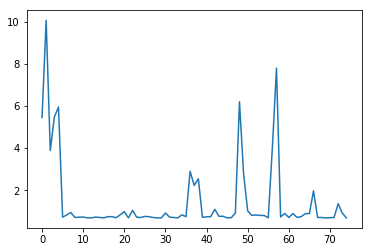

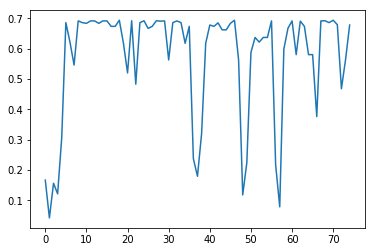

In [26]:
plt.plot(tm_base.data.disc_loss)
plt.show()
plt.plot(tm_base.data.ent_loss)
plt.show()

### 1) b. Starting from zero
Might be difficult to be the lambda schedule to work well

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_concat_from_scratch_20180724' --gender-method='concat' --lambda-discriminator-loss=0.1 --lambda-schedule=100 --noise=4 --seq-len=100
```

In [16]:
tm_base = tm.TrainingMonitor('fader_gender_concat_from_scratch_20180724.csv', exp_name='fader_gender_concat_from_scratch_20180724', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [17]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,1.0,25-Jul-2018 09:41:24,46.699962,46.637444,46.637444,99.273071,0.943925,9.187278e-03
1,2.0,25-Jul-2018 10:33:13,44.942652,44.861011,44.850166,10.843458,0.682243,8.362275e-02
2,3.0,25-Jul-2018 11:25:02,44.216079,44.226399,44.168095,29.151869,0.570093,3.255976e-09


#### Trying again Fri night
Can't exactly remember what the problem was with the original run... there was some problem with the code where it kept giving a divide by zero error. Need to run again and see

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_concat_from_scratch_20180727' --gender-method='concat' --lambda-discriminator-loss=0.1 --lambda-schedule=100 --noise=4 --seq-len=100
```

In [48]:
tm_base = tm.TrainingMonitor('fader_gender_concat_from_scratch_20180727.csv', exp_name='fader_gender_concat_from_scratch_20180727', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [49]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,1.0,27-Jul-2018 17:22:24,46.718994,46.666334,46.666334,13.803811,0.990654,1.225835e-02
1,2.0,27-Jul-2018 18:11:15,44.917471,44.768800,44.736848,31.950350,0.429907,4.531240e-15
2,3.0,27-Jul-2018 19:00:14,44.037767,44.205344,44.194712,5.315421,0.570093,8.386912e-04
3,4.0,27-Jul-2018 19:49:08,44.160146,44.128209,43.379723,249.495331,0.570093,-0.000000e+00
4,5.0,27-Jul-2018 20:38:29,43.184392,43.232266,43.106053,31.553738,0.429907,3.250117e-20
5,6.0,27-Jul-2018 21:27:02,43.758911,43.837315,42.727222,222.018692,0.570093,-0.000000e+00
6,7.0,27-Jul-2018 22:16:02,44.270701,44.414396,42.663294,291.850464,0.570093,-0.000000e+00
7,8.0,27-Jul-2018 23:05:53,43.276073,43.448883,42.189964,179.845795,0.429907,-0.000000e+00
8,9.0,27-Jul-2018 23:55:27,46.480316,46.650617,42.142728,563.485962,0.429907,-0.000000e+00
9,10.0,28-Jul-2018 00:45:01,42.652937,42.663935,42.054121,67.757011,0.429907,1.143460e-40


In [58]:
tm_base = tm.TrainingMonitor('fader_gender_concat_from_scratch_20180727_check_disc.csv', exp_name='fader_gender_concat_from_scratch_20180727', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [59]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,15.0,28-Jul-2018 05:29:39,41.606848,41.663543,41.456607,14.781180,1.000000,0.000950
1,16.0,28-Jul-2018 06:20:54,41.523498,41.695505,41.490808,13.646490,0.962617,0.030526
2,17.0,28-Jul-2018 07:12:01,41.390705,41.570444,41.413957,9.780506,0.962617,0.031659
3,18.0,28-Jul-2018 08:03:03,41.411562,41.552632,41.386898,9.749066,0.822430,0.086942
4,19.0,28-Jul-2018 08:54:19,41.560804,41.797940,41.656895,7.835712,0.906542,0.073716
5,20.0,28-Jul-2018 09:46:44,41.282757,41.461106,41.382611,4.131373,0.775701,0.191119
6,21.0,28-Jul-2018 10:39:18,41.238829,41.469213,41.389314,3.994937,0.691589,0.157103
7,22.0,28-Jul-2018 11:31:24,41.073495,41.366838,41.273645,4.437811,0.579439,0.151333
8,23.0,28-Jul-2018 12:23:32,40.875465,41.022233,40.996315,1.178117,0.635514,0.655162
9,24.0,28-Jul-2018 13:15:31,40.747201,41.005291,40.981472,1.035675,0.598131,0.665310


### Starting from zero with lambda set to zero
* i.e. using the new code, but only training on the reconstruction loss
* so curves should look similar to the basecase, but now we get stats on the discriminator loss

```python
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_concat_from_scratch_nodisc_20180724' --gender-method='concat' --lambda-discriminator-loss=0.  --noise=4 --seq-len=100
```

In [9]:
tm_base = tm.TrainingMonitor('fader_gender_concat_from_scratch_nodisc_20180724.csv', exp_name='fader_gender_concat_from_scratch_nodisc_20180724', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [10]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,1.0,25-Jul-2018 12:22:06,46.634817,46.606836,46.606836,26.090830,0.990654,1.562282e-02
1,2.0,25-Jul-2018 13:10:38,44.832468,44.817070,44.817070,97.624084,1.000000,3.244790e-17
2,3.0,25-Jul-2018 13:59:02,44.267254,44.164277,44.164277,96.235252,1.000000,1.443461e-20
3,4.0,25-Jul-2018 14:47:35,43.545022,43.522027,43.522027,93.986420,1.000000,1.912725e-19
4,5.0,25-Jul-2018 15:36:18,43.314434,43.245135,43.245135,91.666328,1.000000,7.341806e-20
5,6.0,25-Jul-2018 16:24:44,42.610754,42.726946,42.726946,88.694000,1.000000,6.079209e-18
6,7.0,25-Jul-2018 17:13:15,42.522140,42.596443,42.596443,86.312210,1.000000,1.580310e-17
7,8.0,25-Jul-2018 18:01:37,42.199081,42.356593,42.356593,82.267052,1.000000,6.205494e-17
8,9.0,25-Jul-2018 18:49:52,41.739136,41.931148,41.931148,78.052681,1.000000,9.444921e-16
9,10.0,25-Jul-2018 19:38:24,41.807664,41.850070,41.850070,74.056366,1.000000,1.302649e-13


So the discriminator is able to split them apart very easily... however, the split isn't obvious from PCA and the gender variables still seem to work

Should we run the output samples through a simple gender discriminator network and see what the loss/accuracy is like?

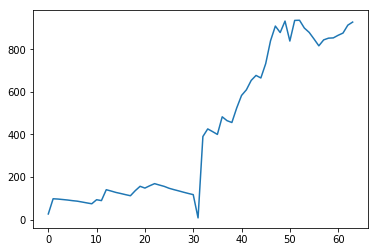

In [15]:
plt.plot(tm_base.data.disc_loss)

In [32]:
# sims from overnight 19-Jul, in case needed
tm_fader = tm.TrainingMonitor('fader_gender_concat_lambda50_20180719.csv', exp_name='fader_gender_concat', path="training_logs")
#tm_fader.disp()

## 2) Training for add with cross_entropy
* Cheating a bit and starting from the bestmodel checkpoint for the baseline sim in the master branch
* Using lambda-discriminator-loss = 0.1
* Using a lambda schedule, but it's fully burned in by the epoch we're picking up from so not relevant
* Watching the initial iterations in the first epoch, you can see the PCA/t-sne plots of the embeddings go from clearly separated to somewhat entangled fairly quickly, even though the stats don't go down that quickly

### 2) a. Starting from bestmodel checkpoint from baseline sim...

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_add_baseline163_20180722' --gender-method='add' --lambda-discriminator-loss=0.1 --lambda-schedule=50 --checkpoint='/home/ubuntu/msc-project-master/msc-project-master/checkpoints/vctk-all-2-v2/bestmodel.pth' --noise=2 --seq-len=300
```

In [20]:
tm_base = tm.TrainingMonitor('fader_gender_add_baseline163_20180722.csv', exp_name='fader_gender_add_baseline163_20180722', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [21]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,163.0,22-Jul-2018 20:02:17,33.623135,34.052110,33.432047,6.200632,0.859813,0.129218
1,164.0,22-Jul-2018 20:39:02,33.322867,33.667962,33.284257,3.837046,0.672897,0.159119
2,165.0,22-Jul-2018 21:15:52,33.120799,33.539839,33.184424,3.554152,0.691589,0.229822
3,166.0,22-Jul-2018 21:52:32,32.709605,33.181705,33.092658,0.890459,0.579439,0.617064
4,167.0,22-Jul-2018 22:29:30,32.569102,33.046235,32.957432,0.888022,0.439252,0.686669


The problem was that the sim so quickly managed to disentangle... but not sure it really made much difference to the perceived outcome

### 500 epochs per discriminator training cycle
* Trying to make the discriminator more powerful at classifying the genders from the speaker embeddings
* Started from epoch 167 of the previous 'add' sim, but now with more discriminator training epochs

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=107 --expName='fader_gender_add_baseline163_500_20180722' --gender-method='add' --lambda-discriminator-loss=0.1 --lambda-schedule=50 --checkpoint='checkpoints/fader_gender_add_baseline163_20180722/epoch_167.pth' --noise=2 --seq-len=300 --num-epochs-discriminator=500
```

stopped on Tuesday after epoch 191

In [18]:
tm_base = tm.TrainingMonitor('fader_gender_add_baseline163_500_20180722.csv', exp_name='fader_gender_add_baseline163_500_20180722', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [19]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,valid_reconstruction_loss,disc_loss,disc_accuracy,ent_loss
0,168.0,23-Jul-2018 00:27:57,33.495793,33.953560,33.226692,7.268681,0.794393,0.075484
1,169.0,23-Jul-2018 02:10:20,33.296504,33.700475,33.239839,4.606375,0.635514,0.147203
2,170.0,23-Jul-2018 03:51:39,32.615657,33.190188,33.084270,1.059186,0.579439,0.611473
3,171.0,23-Jul-2018 05:35:00,32.499685,32.981180,32.898759,0.824188,0.570093,0.621086
4,172.0,23-Jul-2018 07:17:51,32.722193,33.188672,32.915540,2.731307,0.626168,0.343021
5,173.0,23-Jul-2018 09:00:40,32.401873,32.964710,32.892349,0.723621,0.570093,0.682908
6,174.0,23-Jul-2018 10:43:37,32.426427,33.049069,32.884911,1.641567,0.644860,0.536583
7,175.0,23-Jul-2018 12:25:54,33.818443,34.386635,32.985497,14.011401,0.775701,0.076527
8,176.0,23-Jul-2018 14:09:05,33.514581,34.036163,33.025367,10.107938,0.869159,0.075870
9,177.0,23-Jul-2018 15:51:26,33.754943,34.321150,32.925635,13.955142,0.710280,0.067250


So now the discriminator is doing a much better job and is able to split the genders apart in terms of loss, although accuracy is not great - not sure about this

But training is VERY slow... and can't see any obvious differences in the PCA or the samples?

### 2) b. Starting from scratch
Lambda schedule...

## 3) Training for concat with entropy

## 4) Training for add with entropy

#### Check additional eval metrics/consistency

First done on a debug set. Now running on the full set for a single epoch to check that nothing fails. Reconstruction loss doesn't exactly match - the figures calculated during the training batches look much lower. Possibly due to the way the gradients accumulate during the intra-batch sequence iterations?

In [37]:
#tm_fader = tm.TrainingMonitor('fader_gender_test_20180720.csv', exp_name='fader_recreate', path="training_logs")
tm_fader = tm.TrainingMonitor('fader_gender_concat_lambda50_20180720.csv', exp_name='fader_recreate', path="training_logs")

In [38]:
tm_fader.disp()

,disc_accuracy,disc_loss,ent_loss,epoch,train_loss,update_time,valid_loss,valid_reconstruction_loss
0,0.570093,0.692447,0.69266,20.0,48.45991,20-Jul-2018 13:32:57,48.662602,41.73813


In [ ]:
epoch 23: Train (total_loss 44.53, recon_loss 37.44, disc_loss 0.71, disc_ent 0.684, disc_acc 0.570,)

## Baseline sim, in case needed...
* from the master branch

In [28]:
tm_base = tm.TrainingMonitor('vctk_all_20180716_teachT_noiseT.csv', exp_name='vctk_all', path="/home/ubuntu/msc-project-master/msc-project-master/training_logs")

In [29]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval
0,1.0,16-Jul-2018 18:09:31,46.765887,46.710810,NaN,0.986071
1,2.0,16-Jul-2018 18:12:02,44.790641,44.780732,NaN,0.992315
2,3.0,16-Jul-2018 18:14:42,44.118114,43.983935,NaN,0.995677
3,4.0,16-Jul-2018 18:17:22,43.324418,43.409830,NaN,0.989433
4,5.0,16-Jul-2018 18:19:55,43.041549,43.000035,NaN,0.994957
5,6.0,16-Jul-2018 18:22:26,42.664619,42.732058,NaN,0.993516
6,7.0,16-Jul-2018 18:24:58,42.188563,42.293792,NaN,0.993516
7,8.0,16-Jul-2018 18:27:32,41.931577,42.068554,NaN,0.995197
8,9.0,16-Jul-2018 18:30:01,42.055608,42.061366,NaN,0.994476
9,10.0,16-Jul-2018 18:42:43,41.804335,41.885576,6.245347,0.995917


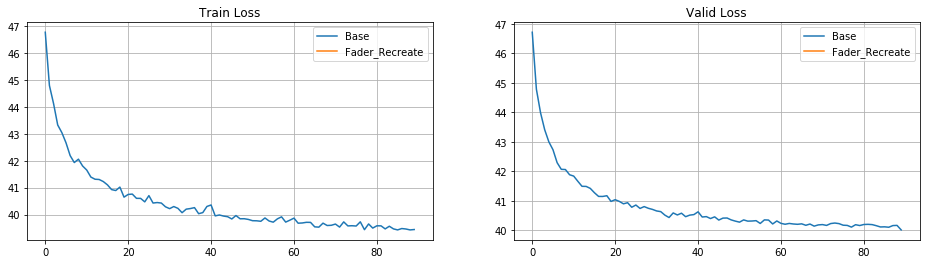

In [30]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(tm_base.data.train_loss)
plt.plot(tm_fader.data.train_loss)
plt.grid(True)
plt.title('Train Loss')
plt.legend({'Base', 'Fader_Recreate'})

plt.subplot(1,2,2)
plt.plot(tm_base.data.valid_loss)
plt.plot(tm_fader.data.valid_loss)
plt.grid(True)
plt.title('Valid Loss')
plt.legend({'Base', 'Fader_Recreate'})